<a href="https://colab.research.google.com/github/andrewj-mit/Deep-Learning-Training/blob/main/MNIST_Classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
# from keras.utils import np_utils

In [2]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


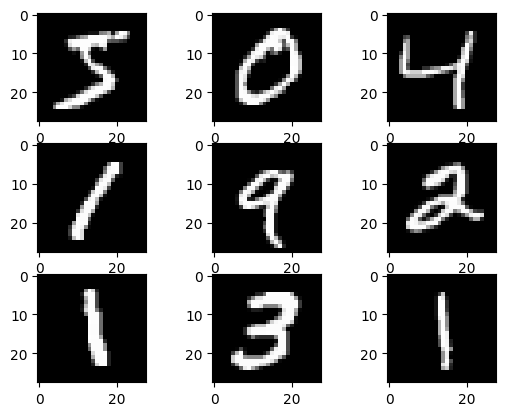

In [3]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [7]:
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
#Define Keras Model
# model is a 3-layer MLP with ReLU and dropout after each layer
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 12s - 26ms/step - accuracy: 0.9269 - loss: 0.2467 - val_accuracy: 0.9667 - val_loss: 0.1050
Epoch 2/20
469/469 - 1s - 3ms/step - accuracy: 0.9697 - loss: 0.1004 - val_accuracy: 0.9713 - val_loss: 0.0880
Epoch 3/20
469/469 - 1s - 3ms/step - accuracy: 0.9769 - loss: 0.0726 - val_accuracy: 0.9779 - val_loss: 0.0713
Epoch 4/20
469/469 - 2s - 5ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9769 - val_loss: 0.0745
Epoch 5/20
469/469 - 1s - 3ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.9811 - val_loss: 0.0643
Epoch 6/20
469/469 - 2s - 4ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.9798 - val_loss: 0.0671
Epoch 7/20
469/469 - 2s - 4ms/step - accuracy: 0.9894 - loss: 0.0324 - val_accuracy: 0.9824 - val_loss: 0.0703
Epoch 8/20
469/469 - 1s - 3ms/step - accuracy: 0.9898 - loss: 0.0303 - val_accuracy: 0.9839 - val_loss: 0.0600
Epoch 9/20
469/469 - 2s - 3ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9812 - val_loss: 0.0665

In [12]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


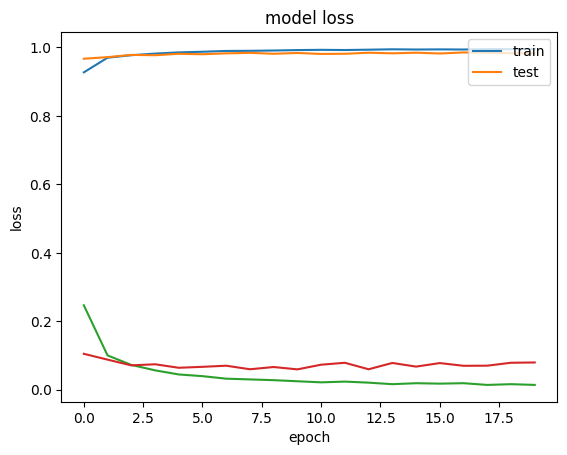

In [13]:
# plotting the metrics
fig = plt.figure()
# plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# plt.tight_layout()

In [14]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
# K.tensorflow_backend.set_image_dim_ordering('th')

In [15]:
seed = 7
numpy.random.seed(seed)

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [20]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu', padding='same')) # Add padding to handle the edge cases
	model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 4s - 15ms/step - accuracy: 0.8722 - loss: 0.4433 - val_accuracy: 0.9521 - val_loss: 0.1647
Epoch 2/10
300/300 - 1s - 3ms/step - accuracy: 0.9524 - loss: 0.1603 - val_accuracy: 0.9691 - val_loss: 0.1011
Epoch 3/10
300/300 - 2s - 6ms/step - accuracy: 0.9649 - loss: 0.1167 - val_accuracy: 0.9749 - val_loss: 0.0779
Epoch 4/10
300/300 - 2s - 7ms/step - accuracy: 0.9716 - loss: 0.0924 - val_accuracy: 0.9777 - val_loss: 0.0686
Epoch 5/10
300/300 - 1s - 3ms/step - accuracy: 0.9757 - loss: 0.0792 - val_accuracy: 0.9807 - val_loss: 0.0581
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9795 - loss: 0.0684 - val_accuracy: 0.9823 - val_loss: 0.0507
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9803 - loss: 0.0639 - val_accuracy: 0.9825 - val_loss: 0.0521
Epoch 8/10
300/300 - 1s - 3ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9837 - val_loss: 0.0471
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9836 - loss: 0.0507 - val_accuracy: 0.9866 - val_loss: 0.0403


In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.37%


#Image Classification Using Pretrained Networks

1. Preprocess the MNIST Dataset:

Convert the MNIST grayscale images to 3-channel RGB images and resize them to 224x224 pixels.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert grayscale images to RGB by duplicating the channels
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

# Resize images to 224x224 to match VGG16 input size
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


2. Load the VGG16 Model and Modify It:

Load the VGG16 model pretrained on ImageNet and modify it for the MNIST task.

In [25]:
# Load the VGG16 model without the top fully connected layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base of VGG16
vgg16_base.trainable = False

# Create a new model with VGG16 as the base
model = Sequential([
    vgg16_base,
    Flatten(),  # Flatten the output to feed into fully connected layers
    Dense(256, activation='relu'),  # Add a dense layer with 256 units
    Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


3. Train and Evaluate the Model:

Train the model on the MNIST dataset and evaluate its performance.

In [ ]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')